In [35]:
import pandas as pd

df = pd.read_csv('MSFT2.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9483,2023-10-27,330.429993,336.720001,328.399994,329.809998,329.809998,29856500
9484,2023-10-30,333.410004,339.450012,331.829987,337.309998,337.309998,22828100
9485,2023-10-31,338.850006,339.000000,334.690002,338.109985,338.109985,20265300
9486,2023-11-01,339.790009,347.420013,339.649994,346.070007,346.070007,28158800


In [36]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9483,2023-10-27,329.809998
9484,2023-10-30,337.309998
9485,2023-10-31,338.109985
9486,2023-11-01,346.070007


In [37]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9483    2023-10-27
9484    2023-10-30
9485    2023-10-31
9486    2023-11-01
9487    2023-11-02
Name: Date, Length: 9488, dtype: object

In [38]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2018-11-05')
datetime_object


datetime.datetime(2018, 11, 5, 0, 0)

In [39]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\anura\AppData\Local\Temp\ipykernel_17112\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9483   2023-10-27
9484   2023-10-30
9485   2023-10-31
9486   2023-11-01
9487   2023-11-02
Name: Date, Length: 9488, dtype: datetime64[ns]

In [40]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-10-27,329.809998
2023-10-30,337.309998
2023-10-31,338.109985


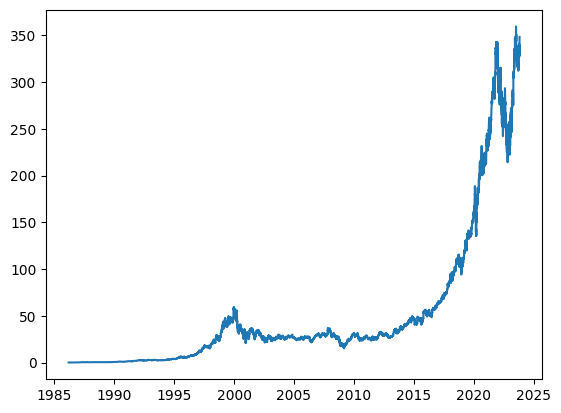

In [41]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])


In [47]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2018-11-05', 
                                '2023-11-02', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-11-05,106.809998,105.919998,106.160004,107.510002
1,2018-11-06,105.919998,106.160004,107.510002,107.720001
2,2018-11-07,106.160004,107.510002,107.720001,111.959999
3,2018-11-08,107.510002,107.720001,111.959999,111.750000
4,2018-11-09,107.720001,111.959999,111.750000,109.570000
...,...,...,...,...,...
1252,2023-10-27,330.529999,340.670013,327.890015,329.809998
1253,2023-10-30,340.670013,327.890015,329.809998,337.309998
1254,2023-10-31,327.890015,329.809998,337.309998,338.109985
1255,2023-11-01,329.809998,337.309998,338.109985,346.070007


In [50]:
def windowed_df_to_date_X_y(windowed_dataframe):
    
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape 



((1257,), (1257, 3, 1), (1257,))

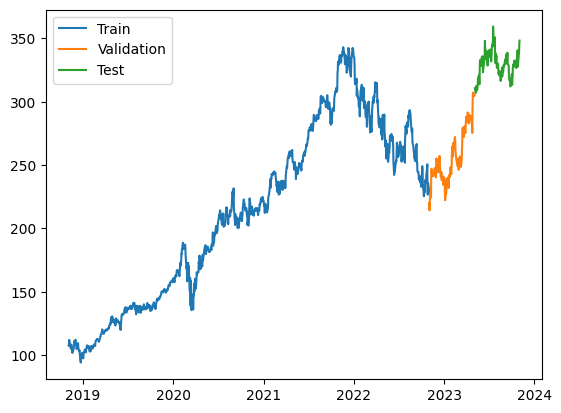

In [51]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
32/32 [==============================] - 8s 51ms/step - loss: 49022.2773 - mean_absolute_error: 210.5856 - val_loss: 65419.1094 - val_mean_absolute_error: 254.8596
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 46907.9609 - mean_absolute_error: 205.3833 - val_loss: 60111.4141 - val_mean_absolute_error: 244.2227
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 39398.6719 - mean_absolute_error: 185.8876 - val_loss: 45258.5312 - val_mean_absolute_error: 211.5797
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 20731.0586 - mean_absolute_error: 123.8757 - val_loss: 15101.3574 - val_mean_absolute_error: 120.9365
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 6583.7749 - mean_absolute_error: 68.3637 - val_loss: 3211.7686 - val_mean_absolute_error: 52.4392
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 3968.2163 - mean_absolute_error: 54.3375 - val_loss: 18

32/32 [==============================] - 1s 3ms/step


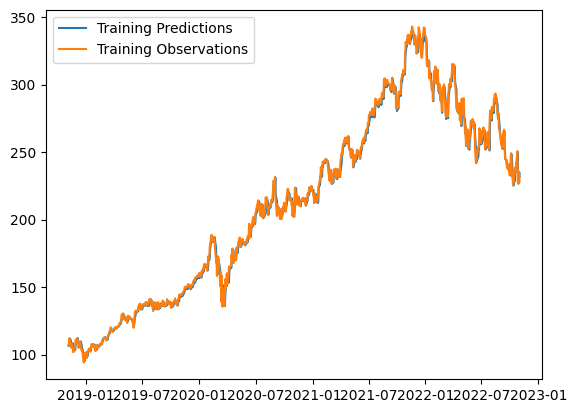

In [54]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 5ms/step


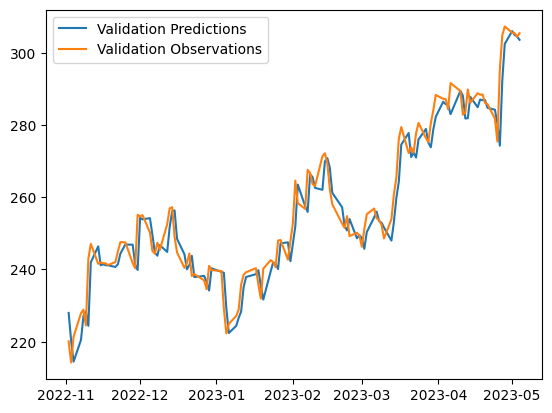

In [55]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 6ms/step


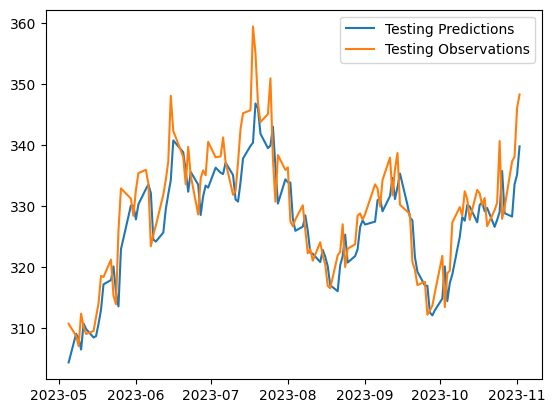

In [56]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

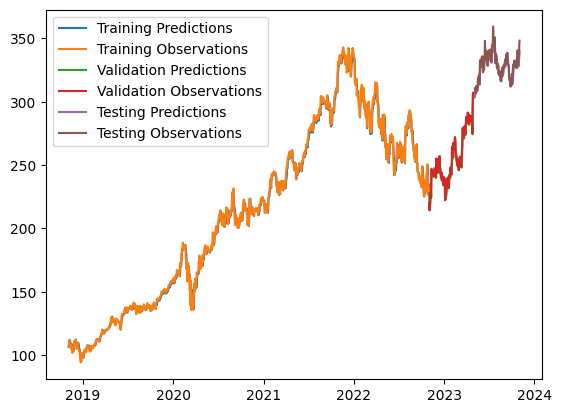

In [57]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [58]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 48ms/step


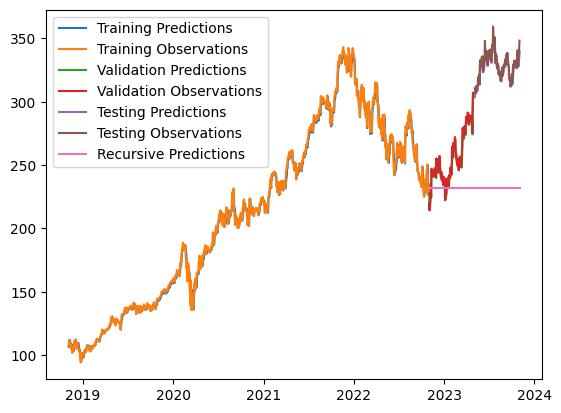

In [59]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])